# K-means Clustering in picture processing
In this notebook, we will apply K-means clustering into one of it simpliest application: photo processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
photo = plt.imread("tree.jpg")

In [3]:
# Run this code cell to print out the shape of the photo
print(photo.shape)
height = photo.shape[0]
wide = photo.shape[1]

(656, 561, 3)


In [4]:
# Reshape the photo so that each pixel is on one line
photo = photo.reshape((height*wide, photo.shape[2]))
print(photo.shape)

(368016, 3)


In [5]:
# Choose K and create K init centers
K = 4
init_centers = photo[np.random.choice(photo.shape[0], K, replace = False)]

In [6]:
# Create a function to find label of each pixel
def assign_labels(photo, centers):
    distances = cdist(photo, centers)
    return np.argmin(distances, axis = 1) 
def assign_centers(photo, labels):
    centers = np.zeros((K, photo.shape[1]))
    for i in range(K):
        Xi = photo[labels == i]
        centers[i] = np.mean(Xi, axis = 0)
    return centers
# Create a stop function, stopping when the centers do not change
def stop(new_centers, old_centers):
    return set(tuple(a) for a in new_centers) == set(tuple(b) for b in old_centers)
def Kmeans(photo, init_centers):
    centers = init_centers
    while True:
        labels = assign_labels(photo, centers)
        new_centers = assign_centers(photo, labels)
        if stop(centers, new_centers):
            return (new_centers, labels)
        centers = new_centers

In [7]:
centers, labels = Kmeans(photo, init_centers)

In [8]:
# Change all the pixels based on their center
res = np.zeros_like(photo)
for i in range(photo.shape[0]):
    res[i] = centers[labels[i]]

In [9]:
res = res.reshape((height, wide, photo.shape[1]))

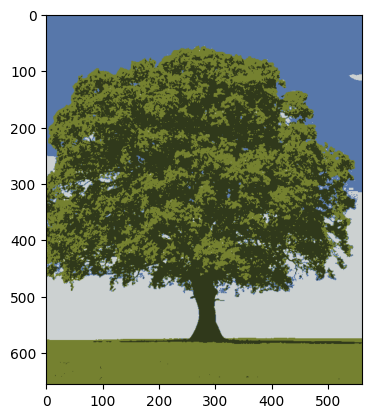

In [11]:
plt.imshow(res)
plt.show()